In [1]:
import sys; sys.path.append("..")
# download this: https://dataverse.harvard.edu/file.xhtml?fileId=5745840&version=2.1
# unpack to ../data

import pandas as pd
import matplotlib.pyplot as plt

def load_props(path):
    temp = pd.read_json(path)
    df = pd.json_normalize(temp.files)
    df['quality'] = temp.quality
    df['ratio'] = df.filesize / df.rawsize
    return df

from evaldets.postprocess import save_plot
c = False  # close plots if True
C = True   # close lesser plots
p = False  # save plot PDFs
plt.rc("font", size=20)

In [2]:
data = {q: load_props(f'../data/rate_ssim_byQ/properties_{q:03d}.json') for q in range(1, 101)} # range(5, 100, 10)
df = pd.concat(data.values())
df.head()

,image,width,height,channels,origchan,filesize,origsize,rawsize,mean_squared_error,peak_signal_noise_ratio,structural_similarity,quality,ratio
0,000000000139.jpg,640,426,3,3,4748,161811,817920,454.432482,21.556110,0.600097,1,0.005805
1,000000000285.jpg,586,640,3,3,10097,335861,1125120,781.154825,19.203432,0.345076,1,0.008974
2,000000000632.jpg,640,483,3,3,5947,155667,927360,700.990881,19.673680,0.438863,1,0.006413
3,000000000724.jpg,375,500,3,3,7089,130107,562500,591.377723,20.412154,0.560630,1,0.012603
4,000000000776.jpg,428,640,3,3,7708,176410,821760,685.421618,19.771226,0.252884,1,0.009380


In [3]:
# %matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)
ax = df.sample(2000, random_state=1).plot.scatter(x='quality', y='ratio');
# ax = df.groupby('quality').structural_similarity.mean().rename('ssim').plot(color='magenta');
df.groupby('quality').ratio.mean().rename('ratio').plot(color='orange');
ax.set_xlabel('Jakość JPEG')
ax.set_ylabel('indeks podobieństwa strukturalnego (SSIM)');
plt.legend()
save_plot(plt.gcf(), "14-plot-size-ratio-1-mean-med-scatter", c=C, p=p)

Saved 14-plot-size-ratio-1-mean-med-scatter.png


In [4]:
plt.violinplot(dataset=[subdf.ratio for q, subdf in df.groupby('quality')])
ax = df.groupby('quality').ratio.mean().rename('średnia').plot()
ax.set_xlabel('Jakość JPEG')
ax.set_ylabel('ratio');
plt.legend()
save_plot(plt.gcf(), "14-plot-size-ratio-2-violinplot", c=C, p=p)

Saved 14-plot-size-ratio-2-violinplot.png


In [5]:
plt.boxplot([subdf.ratio * 100 for q, subdf in df.groupby('quality')]); ax = plt.gca()
ax.set_xticks(range(1, 101, 3))
ax.set_xticklabels(range(1, 101, 3));
ax.set_xlabel('Q')
ax.set_ylabel('wsp. kompresji [%]');
save_plot(plt.gcf(), "14-plot-size-ratio-3-boxplot", c=C, p=p)

Saved 14-plot-size-ratio-3-boxplot.png


Saved 14-plot-size-ratio-3a-boxplot.png


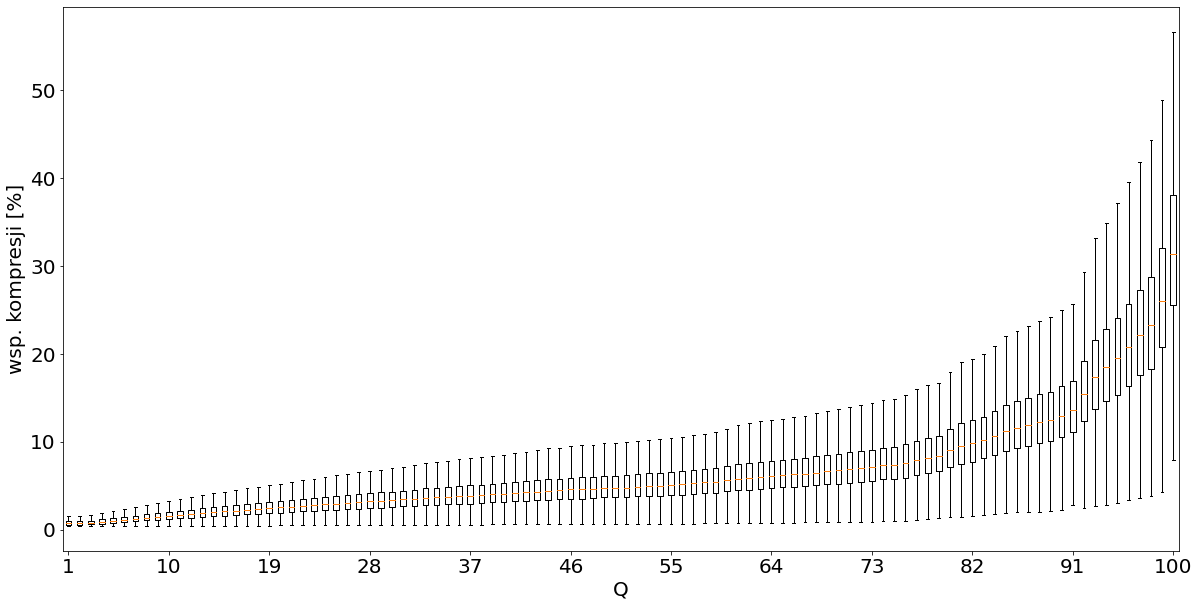

In [9]:
plt.boxplot([subdf.ratio * 100 for q, subdf in df.groupby('quality')], showfliers=False); ax = plt.gca()
ax.set_xticks(range(1, 101, 9))
ax.set_xticklabels(range(1, 101, 9));
ax.set_xlabel('Q')
ax.set_ylabel('wsp. kompresji [%]');
save_plot(plt.gcf(), "14-plot-size-ratio-3a-boxplot", c=c, p=p)

In [7]:
df[df.quality == 20].sort_values('ratio').tail()

,image,width,height,channels,origchan,filesize,origsize,rawsize,mean_squared_error,peak_signal_noise_ratio,structural_similarity,quality,ratio
2559,000000295231.jpg,480,640,1,3,46152,210441,307200,184.280566,25.476008,0.861689,20,0.150234
605,000000068933.jpg,500,313,1,3,23515,117434,156500,401.361086,22.095451,0.857849,20,0.150256
265,000000027982.jpg,500,334,1,3,28617,119554,167000,184.488683,25.471106,0.777144,20,0.171359
617,000000070774.jpg,640,425,1,3,52998,195933,272000,271.392805,23.794820,0.854763,20,0.194846
1404,000000163682.jpg,427,640,3,3,573244,696529,819840,67.527189,29.836017,0.873139,20,0.699214


In [8]:
# some stupid outlier... outliar
pd.options.display.min_rows = 30
df[df.image == '000000163682.jpg'][['quality', 'ratio', 'filesize']]

,quality,ratio,filesize
1404,1,0.685957,562375
1404,2,0.685964,562381
1404,3,0.686356,562702
1404,4,0.687189,563385
1404,5,0.688042,564084
1404,6,0.688877,564769
1404,7,0.689725,565464
1404,8,0.690596,566178
1404,9,0.691448,566877
1404,10,0.692349,567615
